In [1]:
# load netcdf from OM4 runs

import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase

In [2]:
!pip install xoverturning

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install regionmask

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# paths to dataset
BASE = '/scratch/ab10313/OM4_output/'

# load FK data for MOC calculation

ds_ann_FK = xr.open_dataset(BASE+'cntrl/ocean_annual_z.2018-2022.ann.nc')
ds_moc_FK = xr.merge([ds_ann_FK.umo, ds_ann_FK.vmo, ds_ann_FK.uhml, ds_ann_FK.vhml])

# load FK data for MOC calculation

ds_ann_BD = xr.open_dataset(BASE+'c30/ocean_annual_z.2018-2022.ann-004.nc')
ds_moc_BD = xr.merge([ds_ann_BD.umo, ds_ann_BD.vmo, ds_ann_BD.uhml, ds_ann_BD.vhml])

# load static file
ds_stat = xr.open_dataset(BASE+'ocean_annual_z.static.nc')


In [5]:
from xoverturning import calcmoc

In [8]:
# calculate global MOC
amoc_FK = calcmoc(ds_moc_FK, dsgrid=ds_ann_FK,basin='atl-arc')
amoc_BD = calcmoc(ds_moc_BD, dsgrid=ds_stat,basin='atl-arc')

generating basin codes
generating basin codes


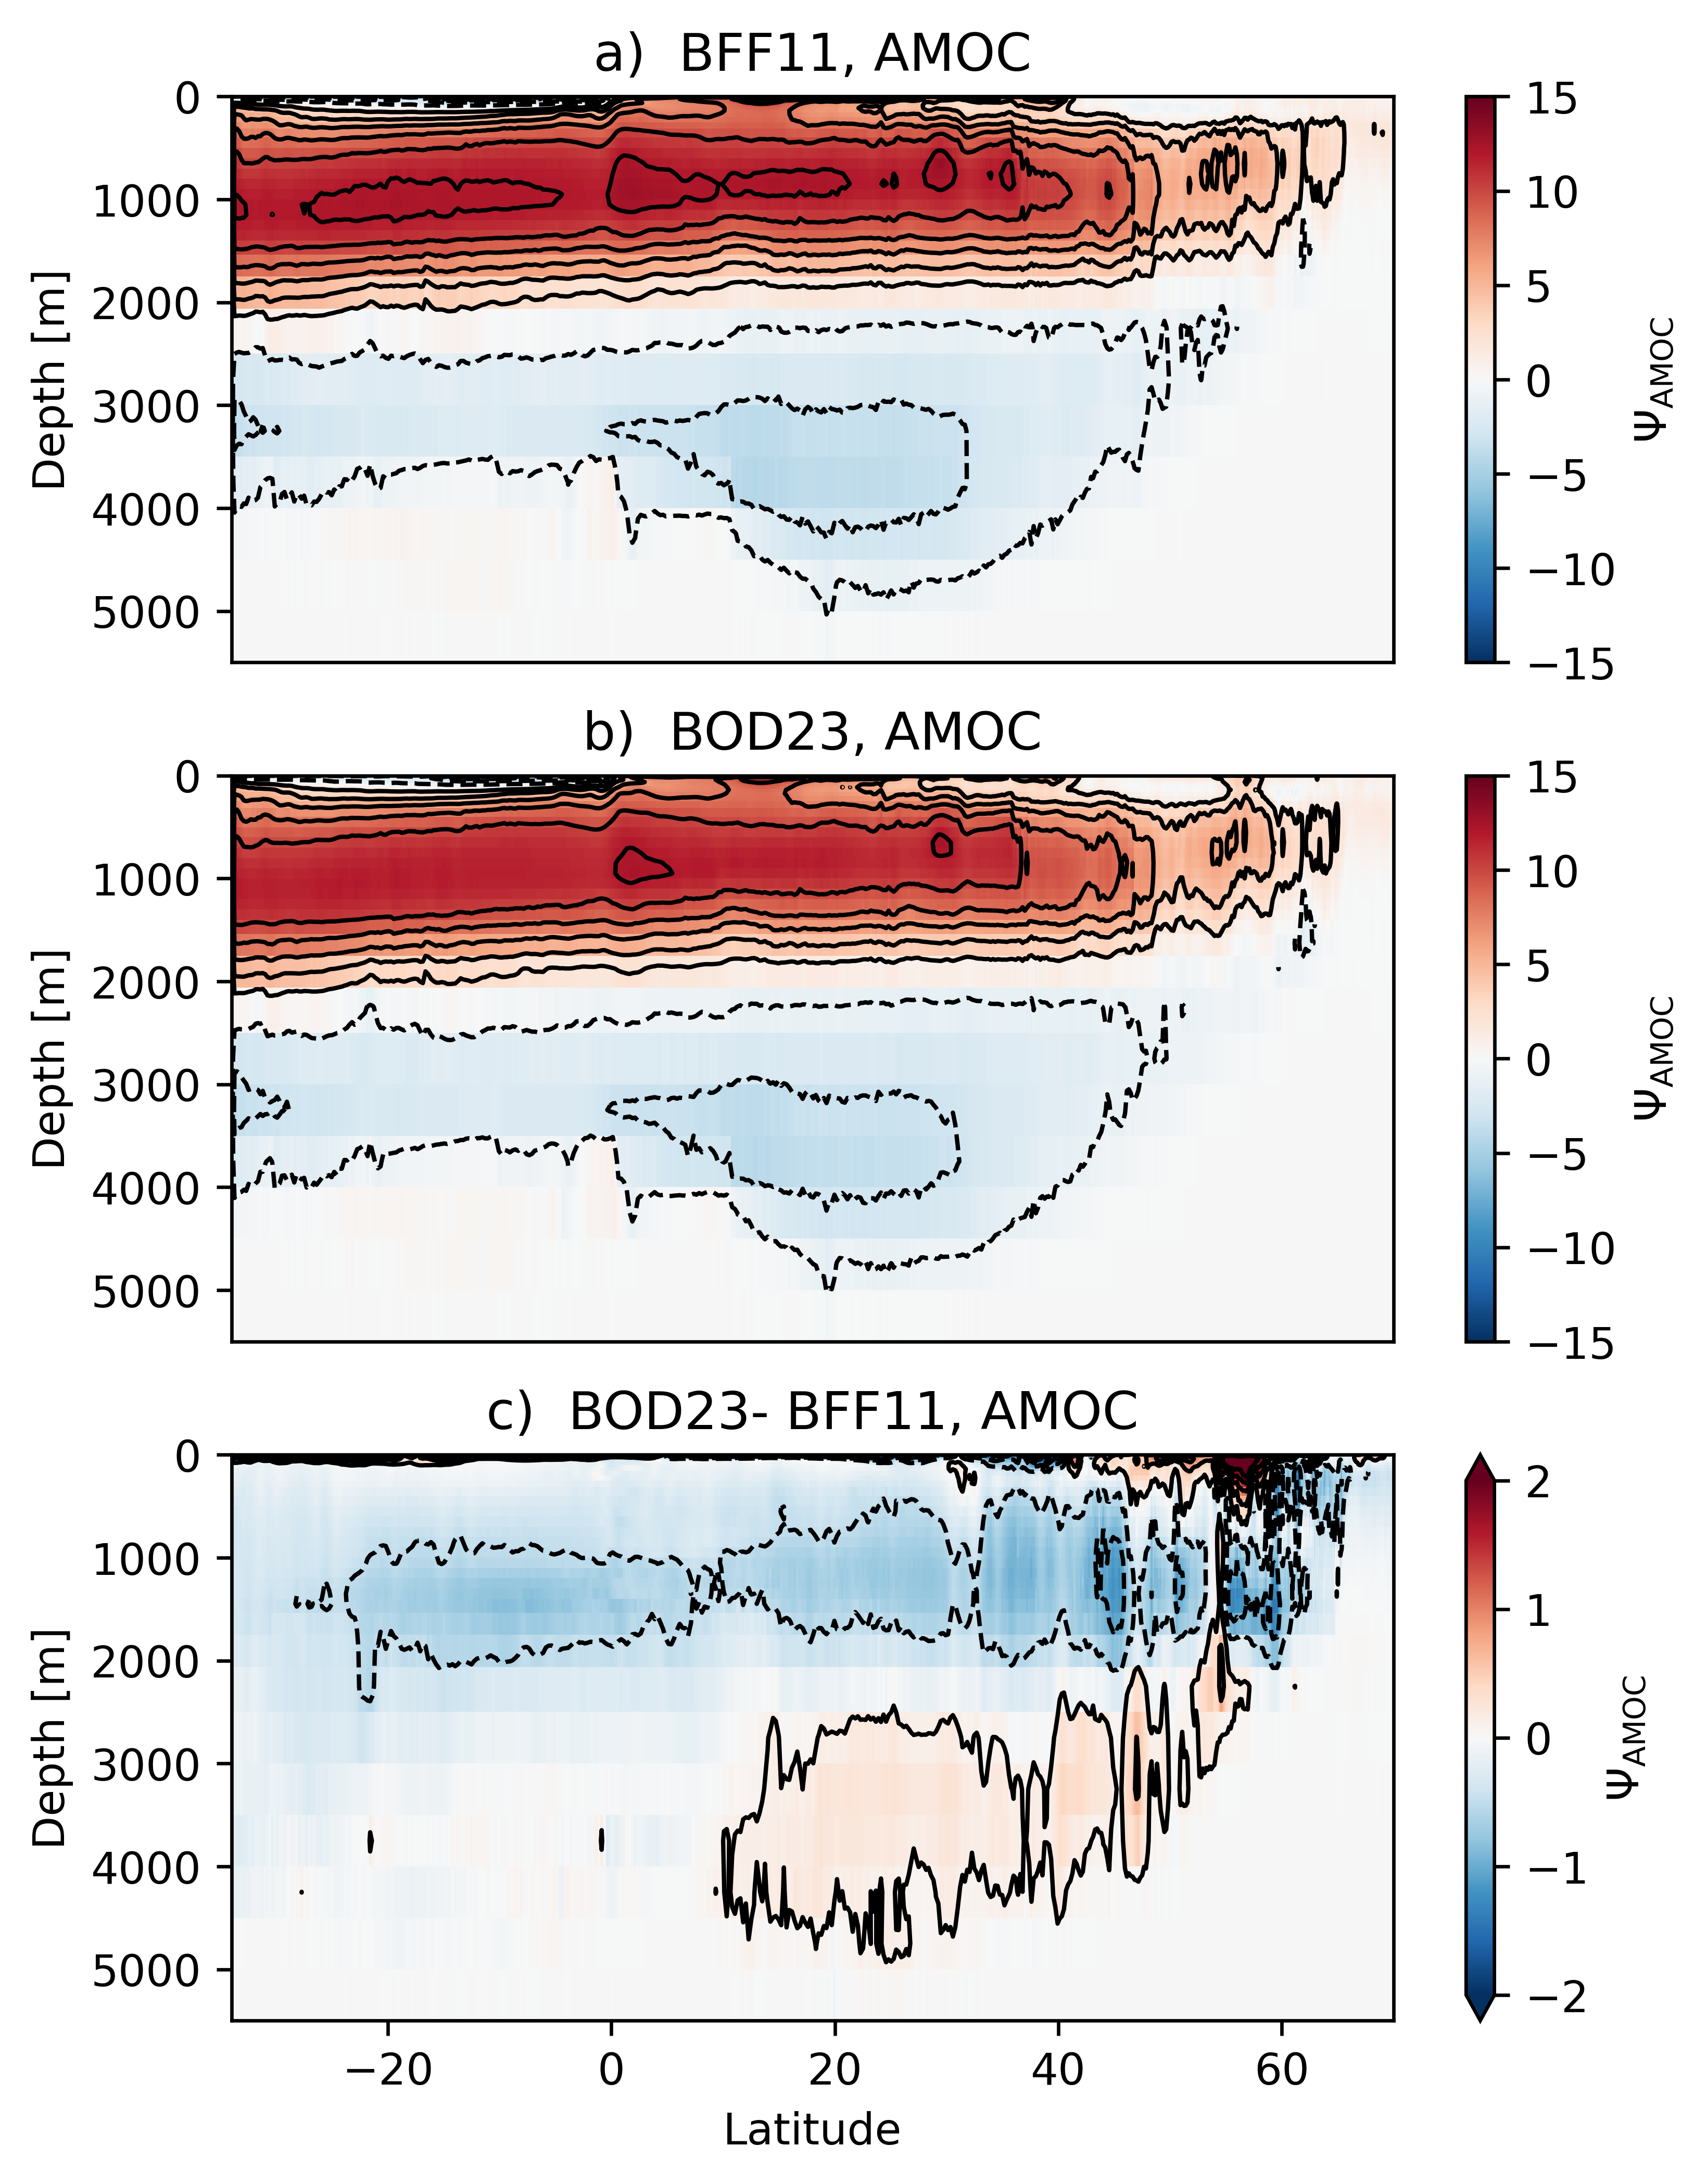

In [58]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(6,8), dpi=600)

ax=ax.flatten()


i_ax = 0
amoc_FK.mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot(ax=ax[i_ax], yincrease=False,vmin=-15,vmax=15,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-15,20,5)})
amoc_FK.mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot.contour(ax=ax[i_ax], yincrease=False, levels=np.concatenate([np.arange(-15,0,2),np.arange(2,15,2)]),
                      colors='k', linewidths=1)
ax[i_ax].set_ylim([5500,0])
ax[i_ax].set_xlim([-34,70])
ax[i_ax].set_title('a)  BFF11, AMOC')
ax[i_ax].set_ylabel('Depth [m]')
ax[i_ax].set_xlabel('')
ax[i_ax].set_xticks([])

i_ax = 1
amoc_BD.mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot(ax=ax[i_ax], yincrease=False,vmin=-15,vmax=15,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-15,20,5)})
amoc_BD.mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot.contour(ax=ax[i_ax], yincrease=False, levels=np.concatenate([np.arange(-15,0,2),np.arange(2,15,2)]),
                      colors='k', linewidths=1)
ax[i_ax].set_ylim([5500,0])
ax[i_ax].set_xlim([-34,70])
ax[i_ax].set_title('b)  BOD23, AMOC')
ax[i_ax].set_ylabel('Depth [m]')
ax[i_ax].set_xlabel('')
ax[i_ax].set_xticks([])


i_ax = 2
(amoc_BD - amoc_FK).mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot(ax=ax[i_ax], yincrease=False,vmin=-2,vmax=2,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-2,2.1,1)})
(amoc_BD - amoc_FK).mean('time').rename('$\Psi_{\mathrm{AMOC}}$').plot.contour(ax=ax[i_ax], yincrease=False, levels=np.concatenate([np.arange(-2,0,.5),np.arange(.1,2.5,.5)]),
                      colors='k', linewidths=1)
ax[i_ax].set_ylim([5500,0])
ax[i_ax].set_xlim([-34,70])
ax[i_ax].set_title('c)  BOD23- BFF11, AMOC')
ax[i_ax].set_ylabel('Depth [m]')
ax[i_ax].set_xlabel('Latitude')


# save figure
plt.savefig('./figures/AMOC_streamfunc')
